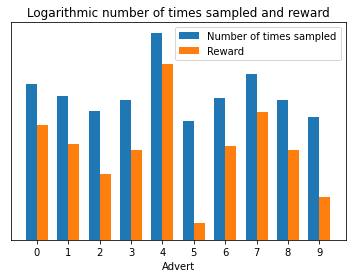

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Reading in data
ds = pd.read_csv('data/Ads_CTR.csv')

N = 10000
d = 10

# Random selection
import random as rn
random_rewards = []

for i in range(20):
    random_reward = 0
    for n in range(N):
        ad = rn.randrange(d)
        random_reward += ds.values[n,ad]
    random_rewards.append(random_reward)

mean_random_reward = np.mean(random_rewards)

## Using the UCB strategy

# Sample each distribution once to initialise. 
ads_selected = [i for i in range(d)]
num_selections = [1] * d
sum_rewards = ds.iloc[0,:].tolist() 
total_reward = sum(sum_rewards)

# The lower bound on the range is 1 since we have already initialised.
# For each round, we choose the ad with the maximum UCB. 
for n in range(1, N):
    ad = 0
    max_upper_bound = 0
    
    # Compute the UCBs for each ad, to find the maximum
    for i in range(d):
        rbar = sum_rewards[i]/num_selections[i]
        delta_i = math.sqrt(3/2 * math.log(n + 1)/num_selections[i])
        ucb = rbar + delta_i

        if ucb > max_upper_bound:
            ad = i
            max_upper_bound = ucb
            
    # Sample the maximal distribution we chose. 
    ads_selected.append(ad)
    num_selections[ad] += 1
    reward = ds.values[n, ad]
    sum_rewards[ad] += reward
    total_reward += reward

# Visualising results on a bar chart

width = 0.35
ind = np.arange(d)

# Take logs
lognum = list(map(lambda x: math.log(x), num_selections))
logreward = list(map(lambda x: math.log(x), sum_rewards))

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, lognum, width)
rects2 = ax.bar(ind + width/2, logreward , width)

ax.set_xlabel('Advert')
ax.set_title('Logarithmic number of times sampled and reward')
ax.set_yticks([])
ax.set_xticks(ind)
ax.legend((rects1[0], rects2[0]), ('Number of times sampled', 'Reward'))

plt.show()